# Exploratory Data Analysis
This python notebook contains the questions asked during my EDA and graphs generated based on those questions.

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# import datasets 
games = pd.read_csv("datasets/games.csv")
players = pd.read_csv("datasets/players.csv")
stats = pd.read_csv("datasets/stats.csv")
teams = pd.read_csv("datasets/teams.csv")

## What is the distribution of scores for home team vs visiting team?

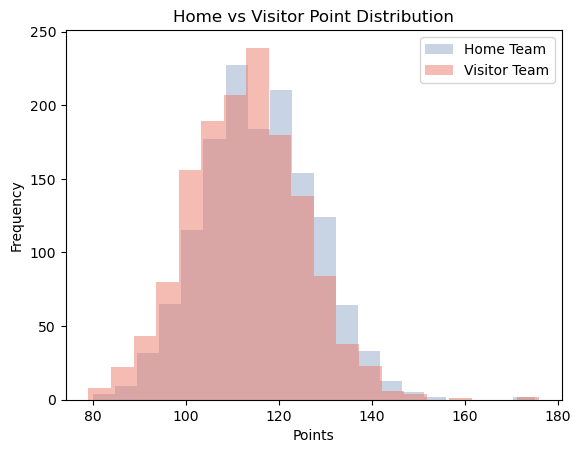

In [4]:
plt.hist(games[['home_team_score']], bins = 20, alpha = 0.5, label = "Home Team", color = '#93A9C8')
plt.hist(games[['visitor_team_score']], bins = 20, alpha = 0.5, label = "Visitor Team", color = '#EB7B69')
plt.legend()
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Home vs Visitor Point Distribution')
plt.show()

In [5]:
print(games['home_team_score'].mean())
print(games['visitor_team_score'].mean())

115.63521126760564
112.9225352112676


The Home team score distribution is higher on the x axis than Visitor team score. We also can see from the means that the mean home team score is higher than visitor team score. 

## Which teams have the highest mean scores?

In [6]:
# average points per game by team

home_team_stats = games.groupby('home_team_abr').agg(
    total_points=pd.NamedAgg(column='home_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='home_team_score', aggfunc='count')
)
visitor_team_stats = games.groupby('visitor_team_abr').agg(
    total_points=pd.NamedAgg(column='visitor_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='visitor_team_score', aggfunc='count')
)
team_stats = home_team_stats.add(visitor_team_stats, fill_value=0)
team_stats['average_points'] = team_stats['total_points'] / team_stats['total_games']
team_stats.sort_values('average_points', ascending=False)
team_stats.rename_axis('team', inplace=True)
team_stats.sort_values('average_points', ascending = False).head()

,total_points,total_games,average_points
team,,,
SAC,11604,96,120.875000
GSW,12157,103,118.029126
ATL,10943,93,117.666667
UTA,10313,88,117.193182
MIL,10833,93,116.483871


## What is the correlation between average points and win/loss record?

In [7]:
team_stats['wins'] = 0
team_stats['losses'] = 0

In [8]:
for index, row in games.iterrows():
    home_team = row['home_team_abr']
    visitor_team = row['visitor_team_abr']
    home_score = row['home_team_score']
    visitor_score = row['visitor_team_score']
    
    # Update win/loss count based on scores
    if home_score > visitor_score:
        team_stats.loc[home_team, 'wins'] += 1
        team_stats.loc[visitor_team, 'losses'] += 1
    else:
        team_stats.loc[home_team, 'losses'] += 1
        team_stats.loc[visitor_team, 'wins'] += 1

In [9]:
team_stats['win_pct'] = team_stats['wins'] / team_stats['total_games']


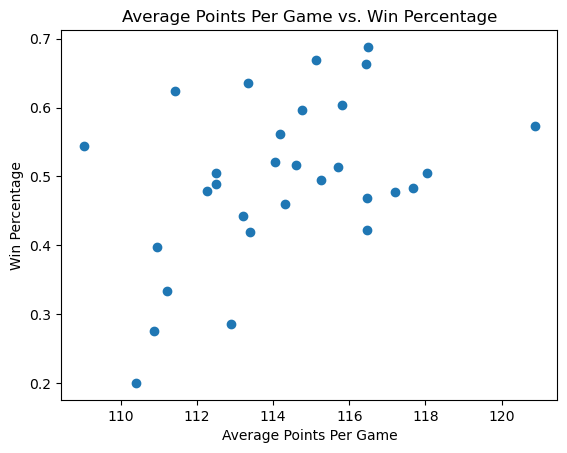

In [10]:
plt.scatter(team_stats['average_points'], team_stats['win_pct'])
plt.xlabel('Average Points Per Game')
plt.ylabel('Win Percentage')
plt.title('Average Points Per Game vs. Win Percentage')
plt.show()

There is a little bit of positive correlation between points and win percentage, but not as much as I was expecting. This makes me wonder if there is any correlation between opponent's points and win percentage...

### Average Opponents Points vs win/loss record

In [11]:
home_team_stats = games.groupby('home_team_abr').agg(
    total_points=pd.NamedAgg(column='home_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='home_team_score', aggfunc='count')
)
visitor_team_stats = games.groupby('visitor_team_abr').agg(
    total_points=pd.NamedAgg(column='visitor_team_score', aggfunc='sum'),
    total_games=pd.NamedAgg(column='visitor_team_score', aggfunc='count')
)
team_stats = home_team_stats.add(visitor_team_stats, fill_value=0)
team_stats['average_points'] = team_stats['total_points'] / team_stats['total_games']
team_stats.sort_values('average_points', ascending=False)
team_stats.rename_axis('team', inplace=True)
team_stats.sort_values('average_points', ascending = False).head()

,total_points,total_games,average_points
team,,,
SAC,11604,96,120.875000
GSW,12157,103,118.029126
ATL,10943,93,117.666667
UTA,10313,88,117.193182
MIL,10833,93,116.483871


In [12]:
home_op_points = games.groupby('visitor_team_abr').agg(
    total_points = pd.NamedAgg(column='home_team_score', aggfunc='sum')
)
visiting_op_points = games.groupby('home_team_abr').agg(
    total_points = pd.NamedAgg(column='visitor_team_score', aggfunc = 'sum')
)
op_stats = home_op_points.add(visiting_op_points, fill_value=0)
team_stats['opponent_total_points'] = op_stats

team_stats['opponent_avg_points'] = team_stats['opponent_total_points'] / team_stats['total_games']
team_stats.head()

,total_points,total_games,average_points,opponent_total_points,opponent_avg_points
team,,,,,
ATL,10943,93,117.666667,10993,118.204301
BKN,10687,95,112.494737,10695,112.578947
BOS,12459,107,116.439252,11865,110.887850
CHA,9675,87,111.206897,10201,117.252874
CHI,10329,92,112.271739,10248,111.391304


In [13]:
team_stats['wins'] = 0
team_stats['losses'] = 0
for index, row in games.iterrows():
    home_team = row['home_team_abr']
    visitor_team = row['visitor_team_abr']
    home_score = row['home_team_score']
    visitor_score = row['visitor_team_score']
    
    # Update win/loss count based on scores
    if home_score > visitor_score:
        team_stats.loc[home_team, 'wins'] += 1
        team_stats.loc[visitor_team, 'losses'] += 1
    else:
        team_stats.loc[home_team, 'losses'] += 1
        team_stats.loc[visitor_team, 'wins'] += 1
team_stats['win_pct'] = team_stats['wins'] / team_stats['total_games']

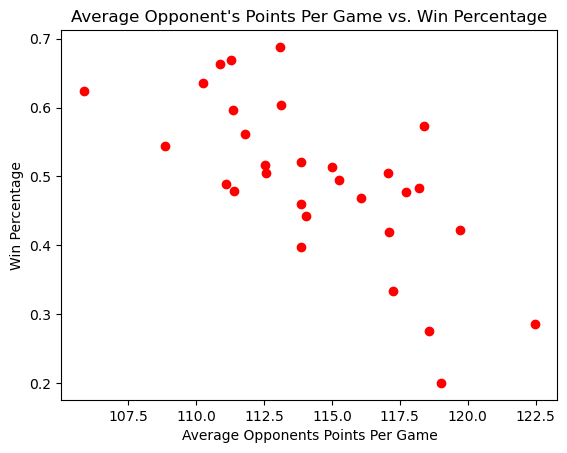

In [14]:
plt.scatter(team_stats['opponent_avg_points'], team_stats['win_pct'], color = "red")
plt.xlabel('Average Opponents Points Per Game')
plt.ylabel('Win Percentage')
plt.title('Average Opponent\'s Points Per Game vs. Win Percentage')
plt.show()

This is much more strongly correlated than own points vs own win/loss record. You can see that it kinda has the same shape as the other graph but mirrored and more tightly arranged. 

## Is there correlation between own points and opponents points per game?

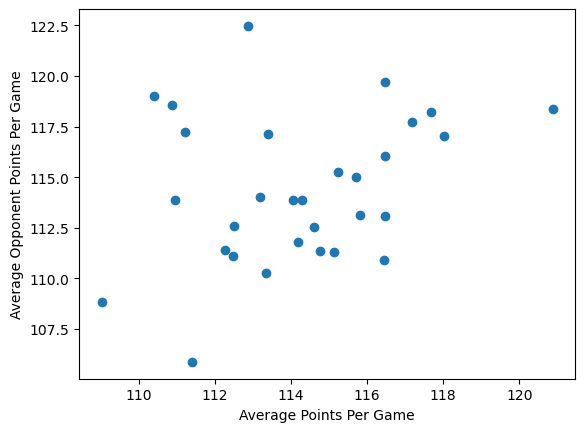

In [15]:
plt.scatter(team_stats['average_points'], team_stats['opponent_avg_points'])
plt.xlabel('Average Points Per Game')
plt.ylabel('Average Opponent Points Per Game')
plt.show()

There isn't that much of a correlation. I wonder how much this would change if it was true points vs average points for each team. 

In [16]:
team_points = pd.read_csv("datasets/team_points.csv")

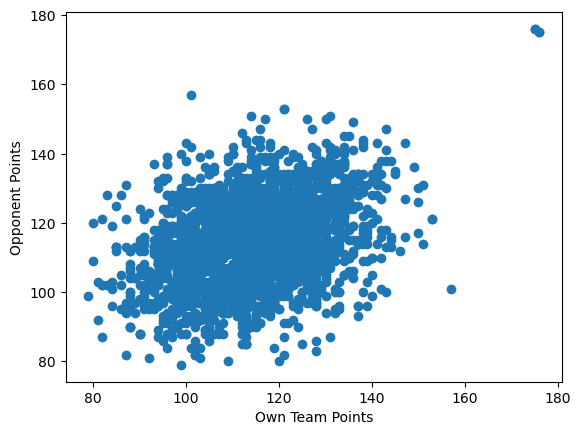

In [17]:
plt.scatter(x = team_points['points'], y = team_points['opponent_points'])
plt.xlabel("Own Team Points")
plt.ylabel("Opponent Points")
plt.show()

With that many more data points it's clear that there is a strong correlation. What does it look like for winning team points vs losing team points?

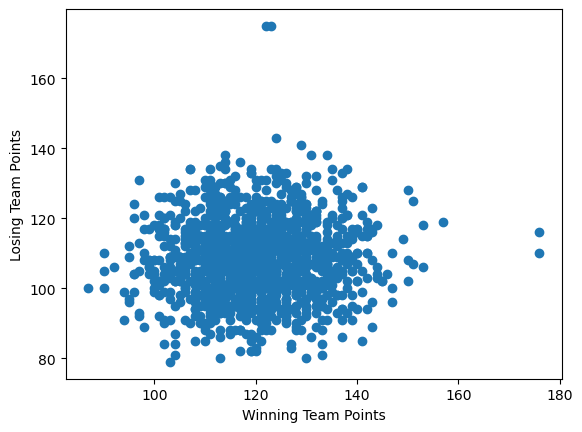

In [18]:
winner = team_points[team_points['points']>team_points['opponent_points']]
loser = team_points[team_points['points']<team_points['opponent_points']]
plt.scatter(x = winner['points'], y = loser['points'])
plt.xlabel("Winning Team Points")
plt.ylabel("Losing Team Points")
plt.show()

I don't think this really shows us anything nor do I think it is correct. :(

## Height and Points

In [23]:
new_stats = stats[stats['min'] != 0 ]
player_points = new_stats.groupby('player_id').agg(
    average_points = pd.NamedAgg(column = 'pts', aggfunc='mean'),
    average_made = pd.NamedAgg(column = 'fg_pct', aggfunc = 'mean'),
    average_3_made = pd.NamedAgg(column = 'fg3_pct', aggfunc = 'mean')
)

player_points = player_points.merge(players[['id', 'height']], left_on = 'player_id', right_on = 'id', how = 'left')
player_points.drop(columns = ['id'], axis = 1, inplace=True)
player_points

,average_points,average_made,average_3_made,height
0,8.425000,0.609250,0.000000,84.0
1,19.707865,0.533563,0.022222,82.0
2,10.724638,0.450840,0.386953,77.0
3,14.120690,0.630221,0.034483,83.0
4,9.153846,0.516411,0.278056,NaN
...,...,...,...,...
529,4.222222,0.494949,0.000000,NaN
530,16.500000,0.691667,0.250000,NaN
531,3.333333,0.208333,0.133333,NaN
532,3.000000,0.333333,0.333333,NaN


In [25]:
player_points.dropna(inplace=True)
player_points['height'] = player_points['height'].astype('int')

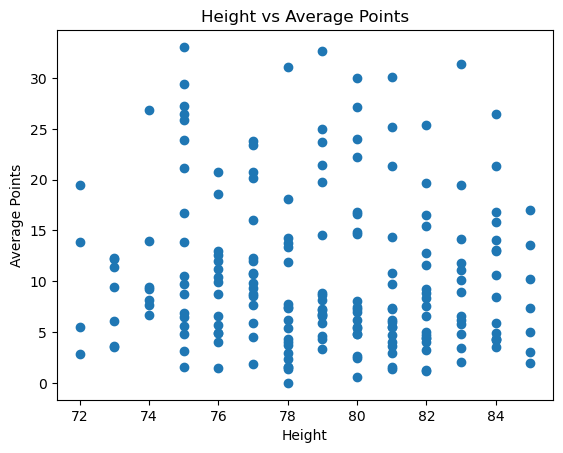

In [26]:
plt.scatter(x = player_points['height'], y = player_points['average_points'])
plt.xlabel("Height")
plt.ylabel("Average Points")
plt.title("Height vs Average Points")
plt.show()

### Height vs shot percentage

In [27]:
player_points.head()

,average_points,average_made,average_3_made,height
0,8.425000,0.609250,0.000000,84
1,19.707865,0.533563,0.022222,82
2,10.724638,0.450840,0.386953,77
3,14.120690,0.630221,0.034483,83
5,31.343750,0.564561,0.280677,83


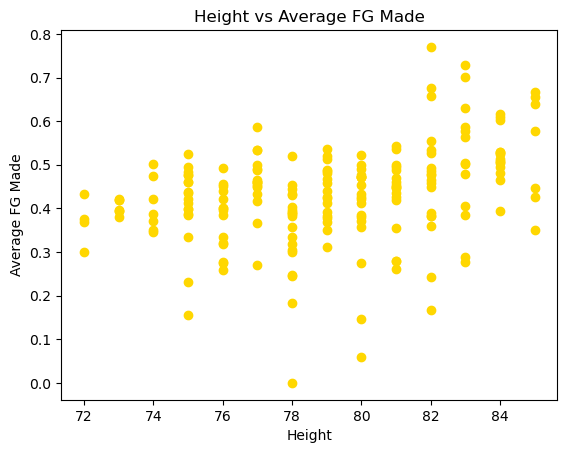

In [35]:
plt.scatter(x = player_points['height'], y = player_points['average_made'], color = "gold")
plt.xlabel("Height")
plt.ylabel("Average FG Made")
plt.title("Height vs Average FG Made")
plt.show()

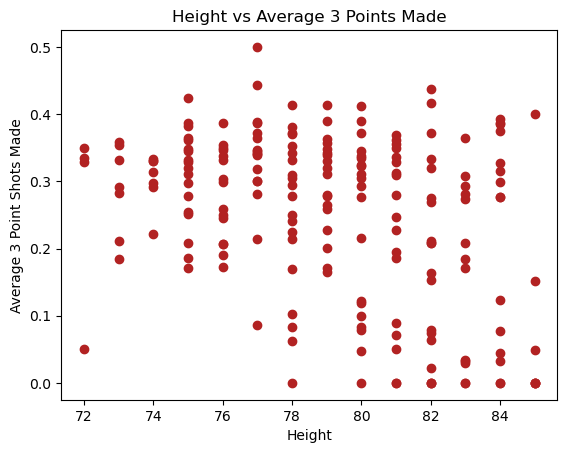

In [36]:
plt.scatter(x = player_points['height'], y = player_points['average_3_made'], color = "firebrick")
plt.xlabel("Height")
plt.ylabel("Average 3 Point Shots Made")
plt.title("Height vs Average 3 Points Made")
plt.show()

What is the distributions of heights??

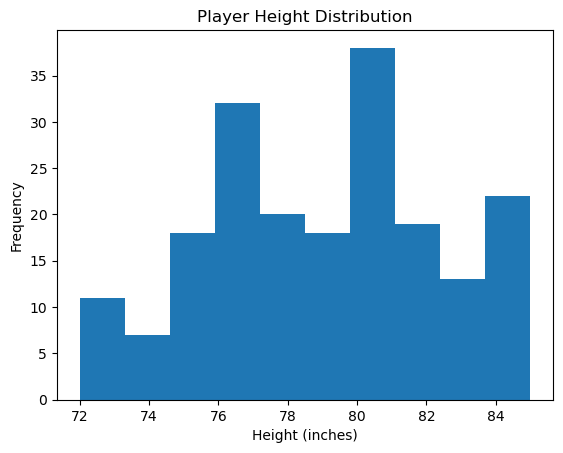

In [185]:
plt.hist(x = player_points['height'], bins = 10)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.title('Player Height Distribution')
plt.show()

In [188]:
print(player_points['height'].mean())
print(player_points['height'].min())
print(player_points['height'].max())

79.03030303030303
72
85


What do rebounds look like for each height?

In [38]:
stats_small = stats[['player_id', 'reb', 'pts', 'fg3m', 'fgm', 'min', 'blk']]
stats_small = stats_small.merge(players[['id', 'height']], left_on = 'player_id', right_on = 'id')
stats_small

,player_id,reb,pts,fg3m,fgm,min,blk,id,height
0,464,3,26,2,9,37,0,464,77.0
1,464,4,15,1,7,32,1,464,77.0
2,464,2,15,1,6,30,1,464,77.0
3,464,3,15,0,6,31,1,464,77.0
4,464,2,13,1,2,18,0,464,77.0
...,...,...,...,...,...,...,...,...,...
19001,444,3,2,0,1,6,0,444,82.0
19002,444,2,0,0,0,4,0,444,82.0
19003,444,0,0,0,0,1,0,444,82.0
19004,444,0,0,0,0,1,0,444,82.0


In [39]:
stats_small.drop(columns = 'id', axis = 1, inplace = True)

In [40]:
stats_small = stats_small[stats_small['min'] != 0]

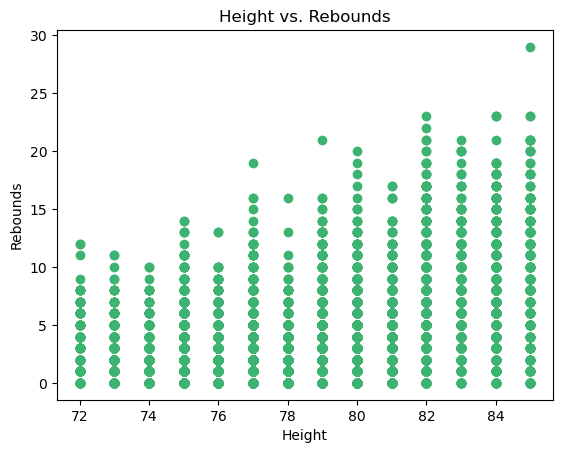

In [46]:
plt.scatter(x = stats_small['height'], y = stats_small['reb'], color = 'mediumseagreen')
plt.xlabel("Height")
plt.ylabel("Rebounds")
plt.title("Height vs. Rebounds")
plt.show()

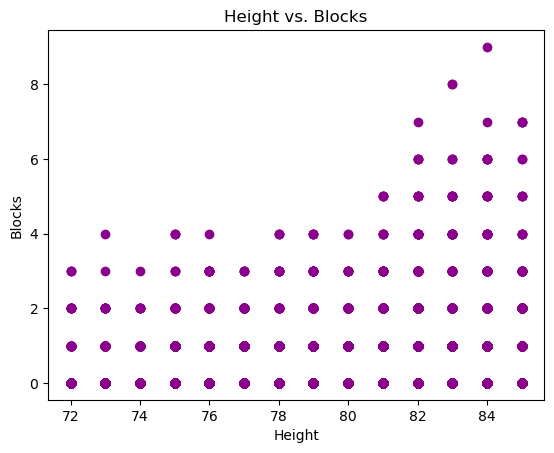

In [48]:
plt.scatter(x = stats_small['height'], y = stats_small['blk'], color = 'darkmagenta')
plt.xlabel("Height")
plt.ylabel("Blocks")
plt.title("Height vs. Blocks")
plt.show()

As expected, the players that are tall are getting more rebounds and making more blocks. 

# I want to see the distributions of a few different metrics and how they vary for each position

In [50]:
stats = stats.merge(players[['id', 'height']], left_on = 'player_id', right_on = 'id')
stats_mini = stats[['position', 'pts', 'reb', 'stl', 'blk', 'ast', 'height']]
melted = stats_mini.melt(id_vars = 'position', var_name = "metric", value_name = "value")

In [52]:
stats_mini.head()


,position,pts,reb,stl,blk,ast,height
0,G,26,3,2,0,3,77.0
1,G,15,4,1,1,1,77.0
2,G,15,2,2,1,1,77.0
3,G,15,3,0,1,3,77.0
4,G,13,2,1,0,1,77.0


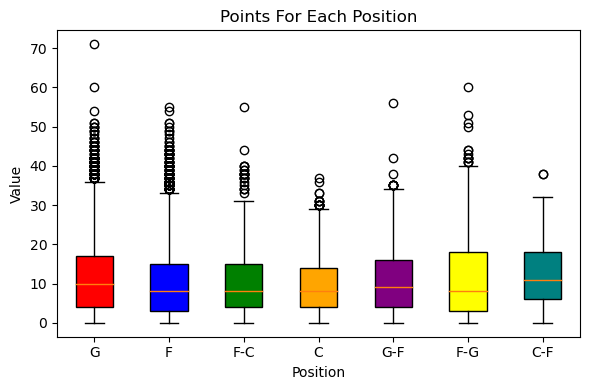

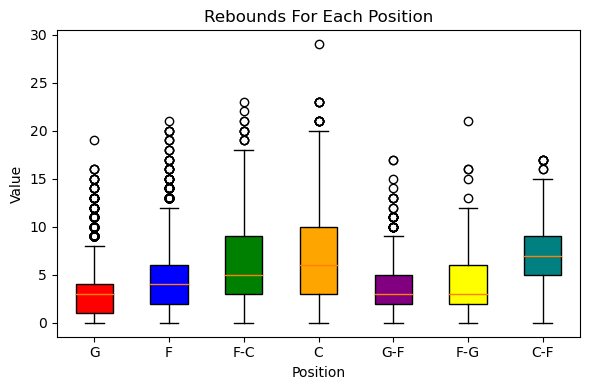

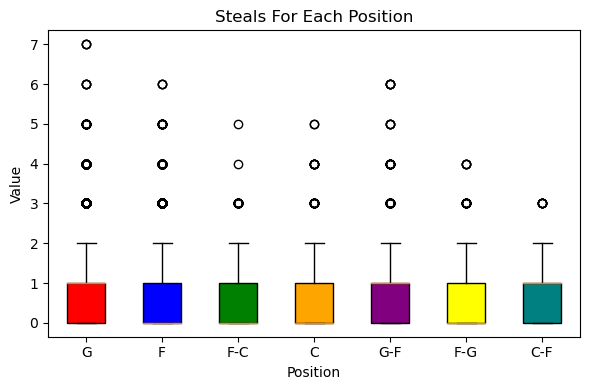

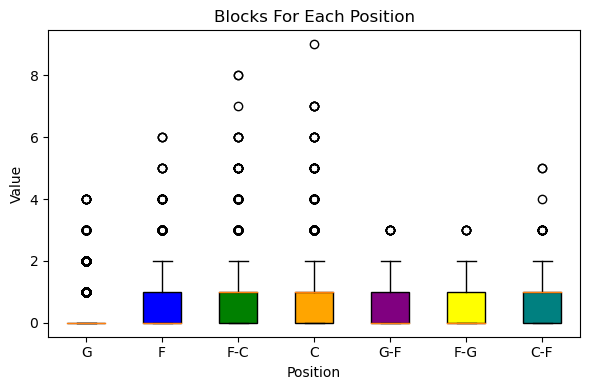

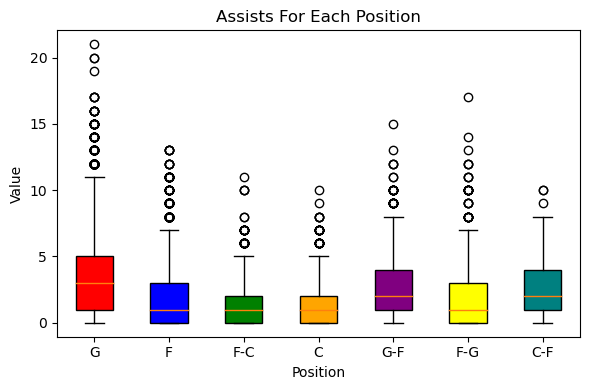

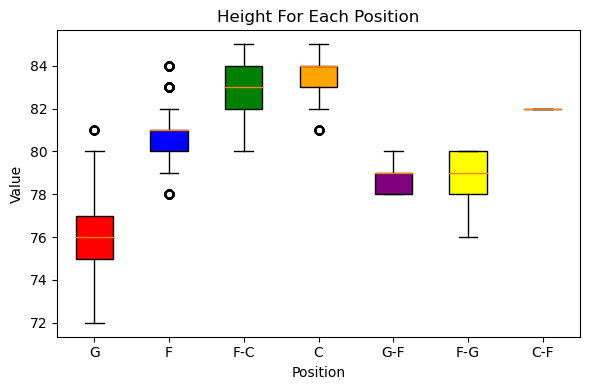

In [69]:
metrics = melted['metric'].unique()
positions = ['G', 'F', 'F-C', 'C', 'G-F', 'F-G', 'C-F']
metrics_nice = ['Points', 'Rebounds', 'Steals', 'Blocks', 'Assists', 'Height']
counter = 0
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'teal']  # Define colors for positions

for metric in metrics:
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    
    metric_data = melted[melted['metric'] == metric]
    # Drop NaN values for the current metric
    metric_data = metric_data.dropna()
    box_data = [metric_data[metric_data['position'] == pos]['value'] for pos in positions]
    bp = plt.boxplot(box_data, patch_artist=True)
    plt.xticks(range(1, len(positions) + 1), positions)
    plt.title(f'{metrics_nice[counter]} For Each Position')
    plt.xlabel('Position')
    plt.ylabel('Value')
    
    # Set colors for each position
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    plt.tight_layout()
    plt.show()
    counter +=1

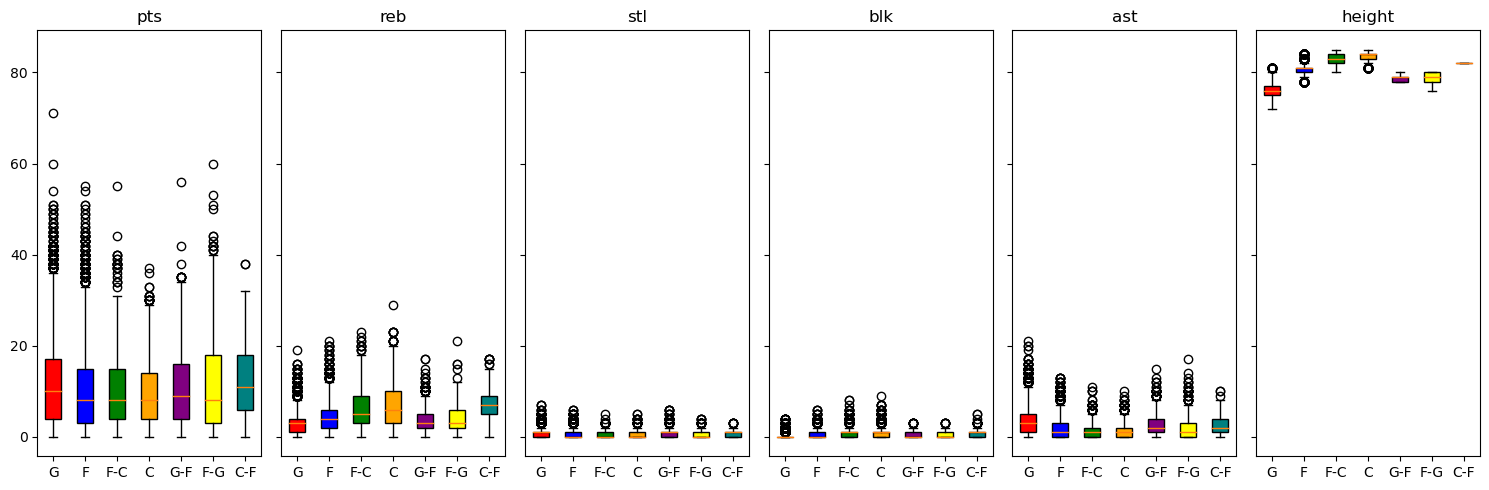

In [51]:
metrics = melted['metric'].unique()
positions = ['G', 'F', 'F-C', 'C', 'G-F', 'F-G', 'C-F']

fig, axs = plt.subplots(nrows=1, ncols=len(metrics), figsize=(15, 5), sharey=True)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'teal']  # Define colors for positions

for i, metric in enumerate(metrics):
    ax = axs[i]
    metric_data = melted[melted['metric'] == metric]
    # Drop NaN values for the current metric
    metric_data = metric_data.dropna()
    box_data = [metric_data[metric_data['position'] == pos]['value'] for pos in positions]
    bp = ax.boxplot(box_data, patch_artist=True)
    ax.set_xticklabels(positions)
    ax.set_title(metric)
    
    # Set colors for each position
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

plt.tight_layout()
plt.show()

# Distribution of points in-season vs postseason

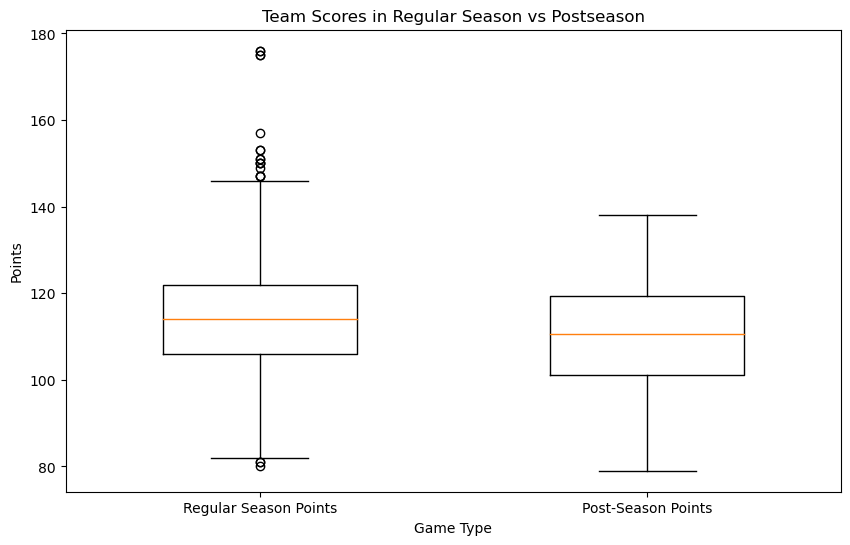

In [159]:
plt.figure(figsize=(10, 6))

plt.boxplot([
    team_points['points'][team_points['postseason'] == False],
    team_points['points'][team_points['postseason'] == True],
], labels=['Regular Season Points', 'Post-Season Points'], widths=0.5)

plt.xlabel('Game Type')
plt.ylabel('Points')
plt.title('Team Scores in Regular Season vs Postseason')
plt.show()

There is basically no difference in distribution of points for regular season and post season. 

I want to explore individual teams and the distribution of their points. How many more points is one team getting than all their opponents? What is the distribution of that for each team? How many more of any metric does a team get than all their opponents?

Go back to the part about height and points and see if theres any difference between height and rebounds or maybe height and two pointers vs three pointers. Heights and positions?? add that to the metrics one

Height and win-loss record??